In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
S = xr.open_dataset('C:/Users/eirik/Master/Data/Horizontal_S.nc')['S']
T = xr.open_dataset('C:/Users/eirik/Master/Data/Horizontal_Temp.nc')['Temp']
hor_vel = xr.open_dataset('C:/Users/eirik/Master/Data/Horizontal_hor_vel.nc')['hor_vel']
eddies = xr.open_dataset('C:/Users/eirik/Master/Data/EddiesTest.nc')['EddyDetection']
display(eddies.time)

<xarray.DataArray 'time' (time: 10)>
array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-10
Attributes:
    long_name:  model_time

In [3]:
domain_center = [[-20,0],[72,73]]
time = ['2018-01-01T00:00:00.000000000','2018-01-10T00:00:00.000000000']

S = S.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
S = S.resample(time='D').mean(dim='time')
S_anom = S - S.mean(dim=["X","Y"])

T = T.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
T = T.resample(time='D').mean(dim='time')
T_anom = T - T.mean(dim=["X","Y"])

hor_vel = hor_vel.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2)).sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2)).sel(Z=-1).sel(time=slice(time[0],time[1]))
hor_vel = hor_vel.resample(time='D').mean(dim='time')

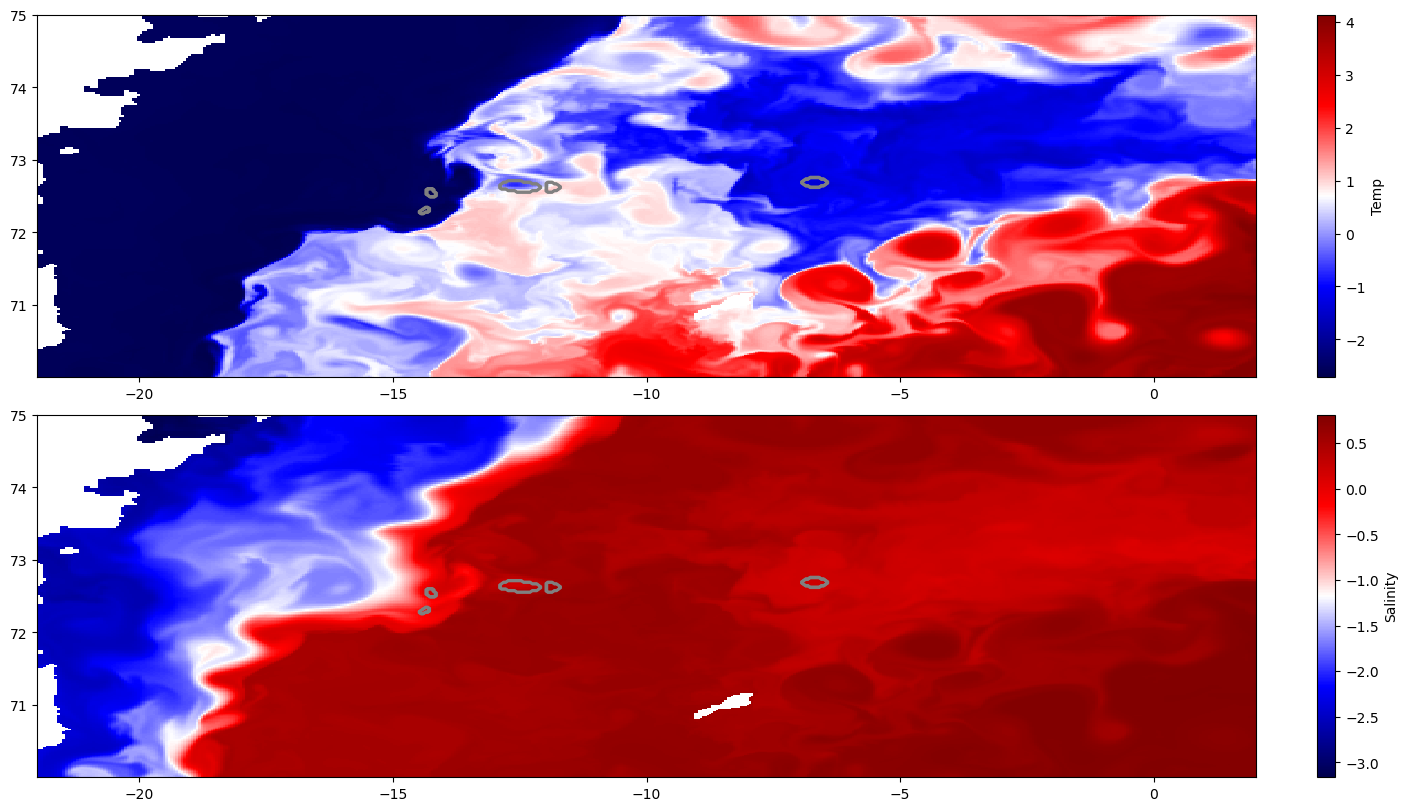

In [4]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,8),layout='constrained')
mesh = ax1.pcolormesh(T_anom.X,T_anom.Y,T_anom[5],cmap='seismic')
cbar = fig.colorbar(mesh)
cbar.set_label('Temp')
cntr = ax1.contour(eddies.X,eddies.Y,eddies[5],colors='grey')

mesh = ax2.pcolormesh(S_anom.X,S_anom.Y,S_anom[5],cmap='seismic')
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
cntr = ax2.contour(eddies.X,eddies.Y,eddies[5],colors='grey')

In [10]:
for i in range(len(eddies)):
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,8),layout='constrained')
    ax1.set_title(f'{T_anom.time[i].values}')
    mesh = ax1.pcolormesh(T_anom.X,T_anom.Y,T_anom[i],cmap='seismic')
    cbar = fig.colorbar(mesh)
    cbar.set_label('Temp')
    cntr = ax1.contour(eddies.X,eddies.Y,eddies[i],colors='grey')

    mesh = ax2.pcolormesh(S_anom.X,S_anom.Y,S_anom[i],cmap='seismic')
    cbar = fig.colorbar(mesh)
    cbar.set_label('Salinity')
    cntr = ax2.contour(eddies.X,eddies.Y,eddies[i],colors='grey')
    plt.savefig(f'C:/Users/eirik/Master/Figures/Eddy_SA_T/{i}SA_T_eddy')
    plt.close(fig)

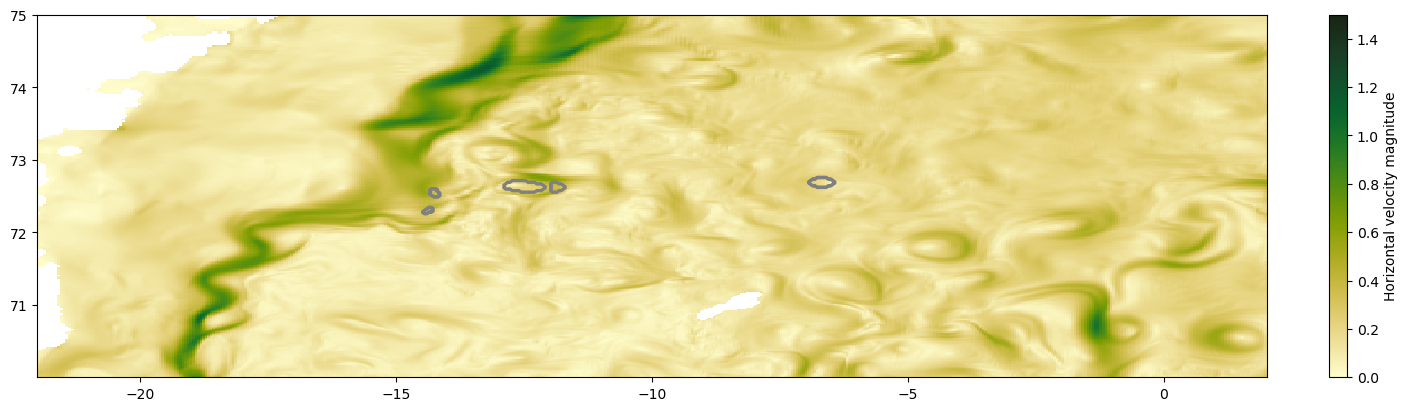

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(14,4),layout='constrained')
mesh = ax1.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel[5],vmin=0,vmax=1.5,cmap=cmo.speed)
cbar = fig.colorbar(mesh)
cbar.set_label('Horizontal velocity magnitude')
cntr = ax1.contour(eddies.X,eddies.Y,eddies[5],colors='grey')



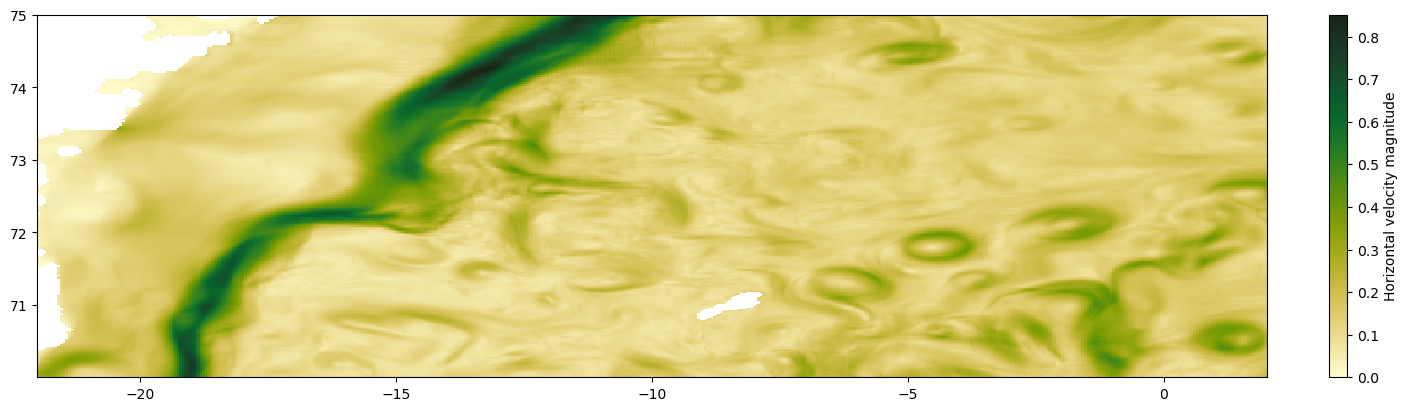

In [7]:
mean_hor_vel = hor_vel.mean(dim='time')
fig, ax1 = plt.subplots(1,1,figsize=(14,4),layout='constrained')
mesh = ax1.pcolormesh(hor_vel.X,hor_vel.Y,mean_hor_vel,vmin=0,cmap=cmo.speed)
cbar = fig.colorbar(mesh)
cbar.set_label('Horizontal velocity magnitude')
# cntr = ax1.contour(eddies.X,eddies.Y,eddies[5],colors='grey')

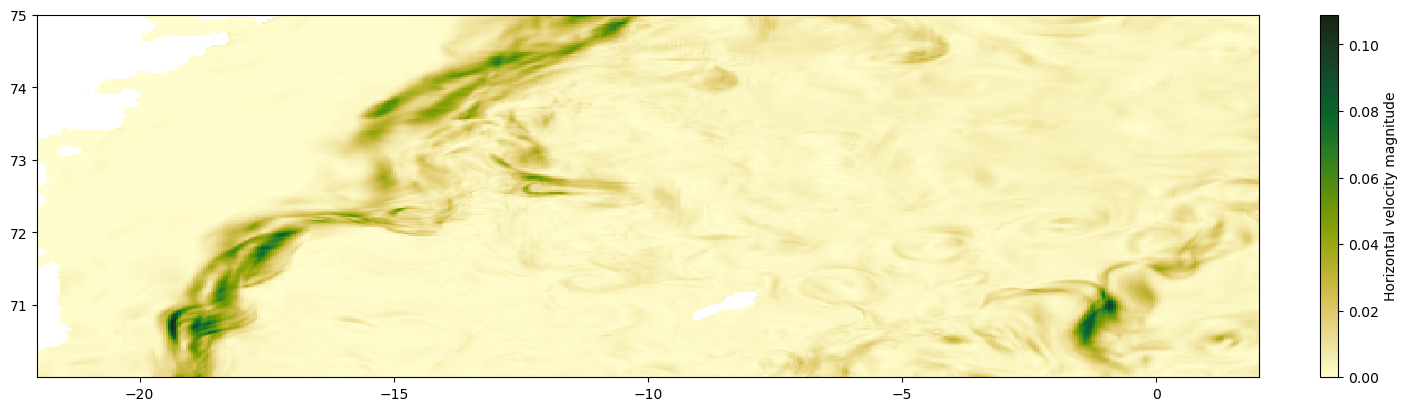

In [8]:
var_hor_vel = hor_vel.var(dim='time')
fig, ax1 = plt.subplots(1,1,figsize=(14,4),layout='constrained')
mesh = ax1.pcolormesh(hor_vel.X,hor_vel.Y,var_hor_vel,vmin=0,cmap=cmo.speed)
cbar = fig.colorbar(mesh)
cbar.set_label('Horizontal velocity magnitude')
# cntr = ax1.contour(eddies.X,eddies.Y,eddies[5],colors='grey')